# **Investigating the Indian start-up ecosystem**

## Introduction

As a team looking to venture into the Indian start-up ecosystem, we are researching to understand the landscape better and identify potential areas of opportunity. I have been assigned the responsibility of studying the Indian start-up ecosystem and suggesting a suitable plan of action for our team’s development. To accomplish this task, I will create a distinctive narrative based on the 2018 to 2021 Indian start-up datasets. This will involve formulating and evaluating a hypothesis, preparing research questions, conducting analysis, and presenting insights through appropriate visualizations.

### Null Hypothesis
Fintech is the most lucrative sector receiving the most significant funding in the Indian start-up ecosystem.

### Alternative Hypothesis
Fintech is not the most lucrative sector as it is not receiving the most significant amount of funding in the Indian start-up ecosystem.

### Research Questions

1. Which sector received the most funding from 2018 to 2021?
2. How much funding has the fintech sector received in the Indian start-up ecosystem over the same period, compared to other sectors?
3. Have there been any significant fintech funding deals in the Indian start-up ecosystem from 2018 to 2021?
4. What are the top 10 sectors that had the most funding over the same period?
5. How many fintech start-up companies received funding from 2018 to 2021 compared to other companies in the top 10 sectors?
6. How does the average amount of funding received by fintech start-ups compare to the average amount of funding received by start-ups in other sectors in the Indian start-up ecosystem over the same period?
7. Have the investment trends in the Indian start-up ecosystem shown a preference for fintech companies over other sectors from 2018 to 2021?


## Data Understanding

I plan to analyze data from 2018 to 2021 to address the research questions, so it is necessary to merge the datasets. However, the column names in the 2018 datasets do not match those in 2019, 2020, and 2021 datasets, and the 2018 dataset also has fewer columns. Additionally, some of the values in the "Amount" column of the 2018 dataset are in rupees instead of dollars like the rest of the datasets.

To resolve these inconsistencies before combining the datasets, I will first adjust the column names of the 2018 dataset to align with the other datasets. After merging the datasets, any missing columns will be filled with null values. Finally, I will convert the rupee values in the "Amount" column to dollars.

In [1]:
import pandas as pd
import numpy as np

import glob
from collections import Counter

from matplotlib import pyplot as plt
import warnings

In [2]:
# load the 2018 and 2019 datasets into dataframes to compare the data in the different columns
# in order to make the column names of the 2018 dataset consistent with the other datasets

start_ups_2018 = pd.read_csv('C:/Users/Eddison/OneDrive/Desktop/Portfolio/LP1 project/Indian-start-up-ecosystem/Indian_start-up_funding/startup_funding2018.csv')
start_ups_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [3]:
start_ups_2019 = pd.read_csv('C:/Users/Eddison/OneDrive/Desktop/Portfolio/LP1 project/Indian-start-up-ecosystem/Indian_start-up_funding/startup_funding2019.csv')
start_ups_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


Check the column names of the datasets

In [4]:

start_ups_2018.columns

Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object')

In [5]:
start_ups_2019.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

Renaming column names of the 2018 data to be consistent with the rest of the data before concatenating

In [6]:
start_ups_2018.rename(columns={'Company Name' : 'Company/Brand', 'Industry' : 'Sector', 'Round/Series' : 'Stage', 'Amount' : 'Amount($)', 'Location' : 'HeadQuarter', 'About Company' : 'What it does'}, inplace = True)
start_ups_2018.columns

Index(['Company/Brand', 'Sector', 'Stage', 'Amount($)', 'HeadQuarter',
       'What it does'],
      dtype='object')

In [7]:
# filter the values in the "Amount" column that are in rupees,
# change the datatype of all values to float, and convert the rupee values to dollars

start_ups_2018['Amount($)']

0           250000
1      ₹40,000,000
2      ₹65,000,000
3          2000000
4                —
          ...     
521      225000000
522              —
523           7500
524    ₹35,000,000
525       35000000
Name: Amount($), Length: 526, dtype: object

In [8]:
filt_rupee = start_ups_2018['Amount($)'].str.contains('₹')
filt_rupee.sum()

144

In [9]:
start_ups_2018['Amount($)'] = start_ups_2018['Amount($)'].apply(lambda x : str(x).replace('$', '').replace('₹', '').replace(',', '').replace('—', '0')).astype(float)
conversion_rate = 0.0146 # conversion rate of rupee to dollar in 2018
converted = start_ups_2018.loc[filt_rupee, 'Amount($)'] * conversion_rate
start_ups_2018.loc[filt_rupee, 'Amount($)'] = converted
start_ups_2018['Amount($)']

0         250000.0
1         584000.0
2         949000.0
3        2000000.0
4              0.0
          ...     
521    225000000.0
522            0.0
523         7500.0
524       511000.0
525     35000000.0
Name: Amount($), Length: 526, dtype: float64

In [10]:
# merge the datasets into a single dataframe
# add a column named "Funding Year" to each dataframe before merging the dataframes,
# to indicate the year the startup received funding

# get data file names
local_path = r'/my_files'

filenames = glob.glob('C:/Users/Eddison/OneDrive/Desktop/Portfolio/LP1 project/Indian-start-up-ecosystem/Indian_start-up_funding' + "/*.csv")

dfs = [pd.read_csv(filename) for filename in filenames]

dfs.remove(dfs[0])

dfs.insert(0, start_ups_2018)

year = 2018

for i in np.arange(len(dfs)):
    dfs[i]['Funding Year'] = year
    year += 1

big_frame = pd.concat(dfs, ignore_index = True)

In [11]:
big_frame.head(10)

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Funding Year,Founded,Founders,Investor,Unnamed: 9
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584000.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949000.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0.0,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN,NaN
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000.0,"Bengaluru, Karnataka, India",Hasura is a platform that allows developers to...,2018,NaN,NaN,NaN,NaN
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,233600.0,"Kalkaji, Delhi, India",Tripshelf is an online market place for holida...,2018,NaN,NaN,NaN,NaN
7,Hyperdata.IO,Market Research,Angel,730000.0,"Hyderabad, Andhra Pradesh, India",Hyperdata combines advanced machine learning w...,2018,NaN,NaN,NaN,NaN
8,Freightwalla,"Information Services, Information Technology",Seed,0.0,"Mumbai, Maharashtra, India",Freightwalla is an international forwarder tha...,2018,NaN,NaN,NaN,NaN
9,Microchip Payments,Mobile Payments,Seed,0.0,"Bangalore, Karnataka, India",Microchip payments is a mobile-based payment a...,2018,NaN,NaN,NaN,NaN


In [12]:
big_frame.tail(10)

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Funding Year,Founded,Founders,Investor,Unnamed: 9
2869,Proeon,Food Production,Seed,$2000000,Pune,Innovating plant protein ingredients with supe...,2021,2018.0,"Ashish Korde, Kevin Parekh","Shaival Desai, Flowstate Ventures",NaN
2870,InfyU Labs,AgriTech,Seed,$200000,Gandhinagar,InfyU Labs is a team of dedicated professional...,2021,2019.0,"Amit Srivastava, Ankit Chauhan",IAN,NaN
2871,TechEagle,Aviation & Aerospace,Seed,$500000,Gurugram,"Safe, secure & reliable On-Demand Drone delive...",2021,2015.0,Vikram Singh Meena,India Accelerator,NaN
2872,Voxelgrids,Deeptech,NaN,$5000000,Bangalore,Voxelgrids is an Magnetic Resonance Imaging te...,2021,2017.0,Arjun Arunachalam,Zoho,NaN
2873,Cogos Technologies,Logistics & Supply Chain,Pre-series A,$2000000,Bangalore,A smart-tech-enabled platform offering a one-s...,2021,2016.0,Prasad Sreeram,Transworld Group,NaN
2874,Gigforce,Staffing & Recruiting,Pre-series A,$3000000,Gurugram,A gig/on-demand staffing company.,2021,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners,NaN
2875,Vahdam,Food & Beverages,Series D,$20000000,New Delhi,VAHDAM is among the world’s first vertically i...,2021,2015.0,Bala Sarda,IIFL AMC,NaN
2876,Leap Finance,Financial Services,Series C,$55000000,Bangalore,International education loans for high potenti...,2021,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures,NaN
2877,CollegeDekho,EdTech,Series B,$26000000,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2021,2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital",NaN
2878,WeRize,Financial Services,Series A,$8000000,Bangalore,India’s first socially distributed full stack ...,2021,2019.0,"Vishal Chopra, Himanshu Gupta","3one4 Capital, Kalaari Capital",NaN


### Data Inspection

In [13]:
big_frame.shape

(2879, 11)

In [14]:
big_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2879 non-null   object
 1   Sector         2861 non-null   object
 2   Stage          1941 non-null   object
 3   Amount($)      2873 non-null   object
 4   HeadQuarter    2765 non-null   object
 5   What it does   2879 non-null   object
 6   Funding Year   2879 non-null   int64 
 7   Founded        2111 non-null   object
 8   Founders       2334 non-null   object
 9   Investor       2253 non-null   object
 10  Unnamed: 9     2 non-null      object
dtypes: int64(1), object(10)
memory usage: 247.5+ KB


Upon examining the dataframe, I discovered that some of the columns, such as "Amount($)" and "Founded" columns contain values that should be numerical but are currently strings (objects). I will need to convert the datatypes of the values in these columns to numerical (float and/or integer).

In [15]:
# clean and convert the datatype of the values in the Amount($) column to float
big_frame['Amount($)']

0        250000.0
1        584000.0
2        949000.0
3       2000000.0
4             0.0
          ...    
2874     $3000000
2875    $20000000
2876    $55000000
2877    $26000000
2878     $8000000
Name: Amount($), Length: 2879, dtype: object

In [16]:
rupee_filter = big_frame['Amount($)'].str.contains('₹')
rupee_filter.sum()

0

In [17]:
shifted = big_frame['Amount($)'] == 'Series C'
big_frame[shifted]

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Funding Year,Founded,Founders,Investor,Unnamed: 9
1912,Fullife Healthcare,Primary Business is Development and Manufactur...,NaN,Series C,Pharmaceuticals\t#REF!,Varun Khanna,2021,2009.0,Morgan Stanley Private Equity Asia,$22000000,NaN
1926,Fullife Healthcare,Primary Business is Development and Manufactur...,NaN,Series C,Pharmaceuticals\t#REF!,Varun Khanna,2021,2009.0,Morgan Stanley Private Equity Asia,$22000000,NaN


In [18]:
big_frame.loc[shifted, 'HeadQuarter'] = big_frame.loc[shifted, 'HeadQuarter'].apply(lambda x: str(x).replace('Pharmaceuticals\t#REF!', str(np.nan))).astype(float)
big_frame.loc[shifted, 'Sector'] = big_frame.loc[shifted, 'Sector'].apply(lambda x: str(x).replace('Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.', 'Pharmaceuticals'))
big_frame.loc[shifted, 'What it does'] = big_frame.loc[shifted, 'What it does'].apply(lambda x: str(x).replace('Varun Khanna', 'Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.'))
big_frame.loc[shifted, 'Amount($)'] = big_frame.loc[shifted, 'Amount($)'].apply(lambda x: str(x).replace('Series C', '$22000000'))
big_frame.loc[shifted, 'Stage'] = big_frame.loc[shifted, 'Stage'].apply(lambda x: str(x).replace(str(np.nan), 'Series C'))
big_frame.loc[shifted, 'Founders'] = big_frame.loc[shifted, 'Founders'].apply(lambda x: str(x).replace('Morgan Stanley Private Equity Asia', 'Varun Khanna'))
big_frame.loc[shifted, 'Investor'] = big_frame.loc[shifted, 'Investor'].apply(lambda x: str(x).replace('$22000000', 'Morgan Stanley Private Equity Asia'))
big_frame[shifted]

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Funding Year,Founded,Founders,Investor,Unnamed: 9
1912,Fullife Healthcare,Pharmaceuticals,Series C,$22000000,NaN,Primary Business is Development and Manufactur...,2021,2009.0,Varun Khanna,Morgan Stanley Private Equity Asia,NaN
1926,Fullife Healthcare,Pharmaceuticals,Series C,$22000000,NaN,Primary Business is Development and Manufactur...,2021,2009.0,Varun Khanna,Morgan Stanley Private Equity Asia,NaN


In [19]:
shifted = big_frame['Amount($)'] == 'Upsparks'
big_frame[shifted]

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Funding Year,Founded,Founders,Investor,Unnamed: 9
1768,FanPlay,Computer Games,$1200000,Upsparks,Computer Games,A real money game app specializing in trivia g...,2021,2020.0,YC W21,"Pritesh Kumar, Bharat Gupta",NaN
1781,FanPlay,Computer Games,$1200000,Upsparks,Computer Games,A real money game app specializing in trivia g...,2021,2020.0,YC W21,"Pritesh Kumar, Bharat Gupta",NaN


In [20]:
big_frame.loc[shifted, 'HeadQuarter'] = big_frame.loc[shifted, 'HeadQuarter'].apply(lambda x: str(x).replace('Computer Games', str(np.nan))).astype(float)
big_frame.loc[shifted, 'Amount($)'] = big_frame.loc[shifted, 'Amount($)'].apply(lambda x: str(x).replace('Upsparks', '$1200000'))
big_frame.loc[shifted, 'Stage'] = big_frame.loc[shifted, 'Stage'].apply(lambda x: str(x).replace('$1200000', str(np.nan))).astype(float)
big_frame.loc[shifted, 'Founders'] = big_frame.loc[shifted, 'Founders'].apply(lambda x: str(x).replace('YC W21', 'Pritesh Kumar, Bharat Gupta'))
big_frame.loc[shifted, 'Investor'] = big_frame.loc[shifted, 'Investor'].apply(lambda x: str(x).replace('Pritesh Kumar, Bharat Gupta', 'Upsparks'))
big_frame[shifted]

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Funding Year,Founded,Founders,Investor,Unnamed: 9
1768,FanPlay,Computer Games,NaN,$1200000,NaN,A real money game app specializing in trivia g...,2021,2020.0,"Pritesh Kumar, Bharat Gupta",Upsparks,NaN
1781,FanPlay,Computer Games,NaN,$1200000,NaN,A real money game app specializing in trivia g...,2021,2020.0,"Pritesh Kumar, Bharat Gupta",Upsparks,NaN


In [21]:
shifted = big_frame['Amount($)'] == 'Seed'
big_frame[shifted]

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Funding Year,Founded,Founders,Investor,Unnamed: 9
1927,MoEVing,MoEVing is India's only Electric Mobility focu...,NaN,Seed,Gurugram\t#REF!,"Vikash Mishra, Mragank Jain",2021,2021.0,"Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,NaN
2818,Godamwale,Logistics & Supply Chain,NaN,Seed,Mumbai,Godamwale is tech enabled integrated logistics...,2021,2016.0,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000\t#REF!,NaN


In [22]:
shifted = big_frame['Amount($)'] == 'ah! Ventures'
big_frame[shifted]

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Funding Year,Founded,Founders,Investor,Unnamed: 9
2208,Little Leap,EdTech,$300000,ah! Ventures,New Delhi,Soft Skills that make Smart Leaders,2021,2020.0,Holistic Development Programs for children in ...,Vishal Gupta,NaN


In [23]:
shifted = big_frame['Amount($)'] == 'Pre-series A'
big_frame[shifted]

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Funding Year,Founded,Founders,Investor,Unnamed: 9
2215,AdmitKard,EdTech,NaN,Pre-series A,Noida,A tech solution for end to end career advisory...,2021,2016.0,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,NaN


In [24]:
shifted = big_frame['Amount($)'] == 'ITO Angel Network LetsVenture'
big_frame[shifted]

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Funding Year,Founded,Founders,Investor,Unnamed: 9


In [25]:
shifted = big_frame['Amount($)'] == 'Jnan'
big_frame[shifted]

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Funding Year,Founded,Founders,Investor,Unnamed: 9


In [26]:
big_frame['Amount($)'] = big_frame['Amount($)'].apply(lambda x : str(x).replace('$', '').replace('₹', '').replace(',', '').replace('—', '0'))
big_frame['Amount($)'] = big_frame['Amount($)'].apply(lambda x : str(x).replace('887000 23000000', str(([int(num) for num in '887000 23000000'.split(' ')][0] + [int(num) for num in '887000 23000000'.split(' ')][1])/ 2)))
big_frame['Amount($)'] = big_frame['Amount($)'].apply(lambda x : str(x).replace('800000000 to 850000000', str(([int(num) for num in '800000000 to 850000000'.split(' to ')][0] + [int(num) for num in '800000000 to 850000000'.split(' to ')][1])/ 2)))
big_frame['Amount($)'] = big_frame['Amount($)'].apply(lambda x : str(x).replace('Undisclosed', str(np.nan)).replace('undisclosed', str(np.nan)).replace('Undiclsosed', str(np.nan)).replace('Undislosed', str(np.nan)))
big_frame['Amount($)'] = big_frame['Amount($)'].apply(lambda x : str(x).replace('Upsparks', str(np.nan)).replace('Series C', str(np.nan)).replace('Seed', str(np.nan)).replace('ah! Ventures', str(np.nan)).replace('Pre-series A', str(np.nan)).replace('ITO Angel Network LetsVenture', str(np.nan)).replace('Jnan', str(np.nan)))
big_frame['Amount($)'].replace('', 0, inplace = True, regex = True)

big_frame['Amount($)'] = big_frame['Amount($)'].astype(float)
big_frame['Amount($)']

0         250000.0
1         584000.0
2         949000.0
3        2000000.0
4              0.0
           ...    
2874     3000000.0
2875    20000000.0
2876    55000000.0
2877    26000000.0
2878     8000000.0
Name: Amount($), Length: 2879, dtype: float64

In [27]:
# clean and convert the datatype of the values in the Founded column to numerical

big_frame['Founded'].replace('-', np.nan, inplace = True, regex = True)
big_frame['Founded'].replace('nan', np.nan, inplace = True, regex = True)
big_frame['Founded'].replace('np.nan', np.nan, inplace = True, regex = True)
big_frame['Founded'] = big_frame['Founded'].astype(float)
big_frame['Founded']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
2874    2019.0
2875    2015.0
2876    2019.0
2877    2015.0
2878    2019.0
Name: Founded, Length: 2879, dtype: float64

In [28]:
big_frame.describe()

,Amount($),Funding Year,Founded
count,2.472000e+03,2879.000000,2110.000000
mean,1.137677e+08,2020.023619,2016.079621
std,3.329785e+09,1.086974,4.368006
min,0.000000e+00,2018.000000,1963.000000
25%,6.000000e+05,2020.000000,2015.000000
50%,2.500000e+06,2020.000000,2017.000000
75%,1.020500e+07,2021.000000,2019.000000
max,1.500000e+11,2021.000000,2021.000000


In [29]:
big_frame.dtypes

Company/Brand     object
Sector            object
Stage             object
Amount($)        float64
HeadQuarter       object
What it does      object
Funding Year       int64
Founded          float64
Founders          object
Investor          object
Unnamed: 9        object
dtype: object

In [30]:
big_frame['Sector'] = big_frame['Sector'].apply(lambda x: str(x).split(',')[0])
big_frame['Sector'] = big_frame['Sector'].apply(lambda x: str(x).capitalize())
big_frame['Sector']

0             Brand marketing
1                 Agriculture
2                      Credit
3          Financial services
4        E-commerce platforms
                ...          
2874    Staffing & recruiting
2875         Food & beverages
2876       Financial services
2877                   Edtech
2878       Financial services
Name: Sector, Length: 2879, dtype: object

In [31]:
big_frame['HeadQuarter'] = big_frame['HeadQuarter'].apply(lambda x: str(x).split(',')[0])
big_frame['HeadQuarter'] = big_frame['HeadQuarter'].apply(lambda x: str(x).capitalize())
big_frame['HeadQuarter']

0       Bangalore
1          Mumbai
2         Gurgaon
3           Noida
4       Hyderabad
          ...    
2874     Gurugram
2875    New delhi
2876    Bangalore
2877     Gurugram
2878    Bangalore
Name: HeadQuarter, Length: 2879, dtype: object

In [32]:

big_frame.isna().sum()

Company/Brand       0
Sector              0
Stage             938
Amount($)         407
HeadQuarter         0
What it does        0
Funding Year        0
Founded           769
Founders          545
Investor          626
Unnamed: 9       2877
dtype: int64

In [33]:
unnamed_null = big_frame['Unnamed: 9'].isna().sum()
(unnamed_null / big_frame.shape[0]) * 100

99.93053143452588

The "Unnamed: 9" column has more than 99% missing values. For that reason, I will drop this column

In [34]:
big_frame.drop(['Unnamed: 9'], axis = 1, inplace = True)
big_frame.columns

Index(['Company/Brand', 'Sector', 'Stage', 'Amount($)', 'HeadQuarter',
       'What it does', 'Funding Year', 'Founded', 'Founders', 'Investor'],
      dtype='object')

In [35]:
# check for duplicated rows
big_frame.duplicated().sum()

23

In [36]:
# check for duplicated columns
big_frame.T.duplicated().sum()

0

In [37]:
big_frame = big_frame.drop_duplicates()

In [38]:
big_frame.shape

(2856, 10)

### 1. Which sector received the most funding from 2018 to 2021?

In [39]:
sector_grp = big_frame.groupby('Sector')
funding_by_sector = sector_grp['Amount($)'].sum().reset_index()
most_funded_sector = funding_by_sector.sort_values(by = 'Amount($)', ascending = False).head(1)
most_funded_sector

,Sector,Amount($)
253,Fintech,1.547826e+11


### 2. How much funding has the fintech sector received in the Indian start-up ecosystem over the same period, compared to other sectors?

In [40]:
total_funding_by_sector = funding_by_sector.sort_values(by = 'Amount($)', ascending = False)
total_funding_by_sector['Percent Funding(%)'] = (total_funding_by_sector['Amount($)'] / total_funding_by_sector['Amount($)'].sum()) * 100
filt = (total_funding_by_sector['Sector'] == 'Fintech')
total_funding_by_sector.loc[filt]

,Sector,Amount($),Percent Funding(%)
253,Fintech,1.547826e+11,55.187467


### 3. Have there been any significant fintech funding deals in the Indian start-up ecosystem from 2018 to 2021?

In [41]:
fintech_filt = big_frame['Sector'] == 'Fintech'
most_significant_fintech_funding = big_frame.loc[fintech_filt, ['Company/Brand', 'Founded', 'Sector', 'Amount($)', 'Funding Year']].sort_values(by = 'Amount($)', ascending = False).head(1)
most_significant_fintech_funding

,Company/Brand,Founded,Sector,Amount($),Funding Year
1743,Alteria Capital,2018.0,Fintech,1.500000e+11,2021


### 4. What are the top 10 sectors that had the most funding over the same period?

In [42]:
top_10_sectors = total_funding_by_sector.head(10)
top_10_sectors

,Sector,Amount($),Percent Funding(%)
253,Fintech,1.547826e+11,55.187467
454,Retail,7.054238e+10,25.151766
210,Edtech,5.879829e+09,2.096443
199,E-commerce,3.104598e+09,1.106939
504,Tech company,3.022700e+09,1.077739
267,Food delivery,2.673076e+09,0.953081
51,Automotive,2.250389e+09,0.802372
400,Multinational conglomerate company,2.200000e+09,0.784406
252,Financial services,2.080802e+09,0.741907
308,Hospitality,1.735561e+09,0.618811


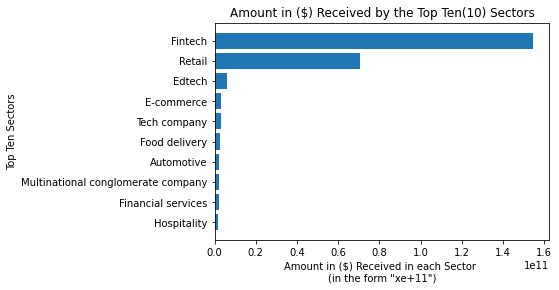

In [43]:
top_10_sectors = top_10_sectors.sort_values(by = 'Amount($)')
sector = top_10_sectors['Sector']
total_amount = top_10_sectors['Amount($)']

plt.barh(sector, total_amount)

plt.title('Amount in ($) Received by the Top Ten(10) Sectors')
plt.xlabel('Amount in ($) Received in each Sector \n(in the form "xe+11")')
plt.ylabel('Top Ten Sectors')

plt.show()

### 5. How many fintech start-up companies received funding from 2018 to 2021 compared to other companies in the top 10 sectors?

In [44]:
number_of_companies_funded = []

for sector in list(top_10_sectors['Sector']):
    number_of_companies_funded.append((big_frame['Sector'] == sector).sum())

top_10_sectors['Companies By Sector'] = number_of_companies_funded
top_10_sectors['Percent of Companies By Sector(%)'] = (top_10_sectors['Companies By Sector'] / top_10_sectors['Companies By Sector'].sum()) * 100
top_10_sectors

,Sector,Amount($),Percent Funding(%),Companies By Sector,Percent of Companies By Sector(%)
308,Hospitality,1.735561e+09,0.618811,22,2.820513
252,Financial services,2.080802e+09,0.741907,86,11.025641
400,Multinational conglomerate company,2.200000e+09,0.784406,1,0.128205
51,Automotive,2.250389e+09,0.802372,53,6.794872
267,Food delivery,2.673076e+09,0.953081,7,0.897436
504,Tech company,3.022700e+09,1.077739,10,1.282051
199,E-commerce,3.104598e+09,1.106939,95,12.179487
210,Edtech,5.879829e+09,2.096443,221,28.333333
454,Retail,7.054238e+10,25.151766,26,3.333333
253,Fintech,1.547826e+11,55.187467,259,33.205128


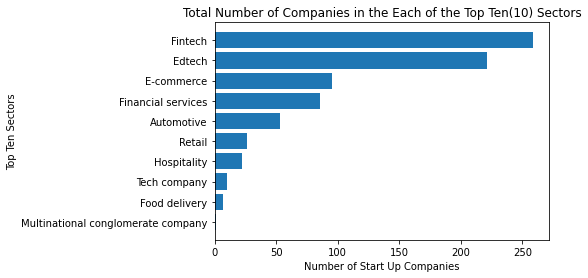

In [45]:
top_10_sectors = top_10_sectors.sort_values(by = 'Companies By Sector')
sector = top_10_sectors['Sector']
num_of_start_ups = top_10_sectors['Companies By Sector']

plt.barh(sector, num_of_start_ups)

plt.title('Total Number of Companies in the Each of the Top Ten(10) Sectors')
plt.xlabel('Number of Start Up Companies')
plt.ylabel('Top Ten Sectors')

plt.show()

### 6. How does the average amount of funding received by fintech start-ups compare to the average amount of funding received by start-ups in other sectors in the Indian start-up ecosystem over the same period?

In [46]:
mean_funding = sector_grp['Amount($)'].mean().reset_index()
average_funding_by_sector = mean_funding.sort_values(by = 'Amount($)', ascending = False)
average_funding_by_sector['Mean Percent Funding(%)'] = (average_funding_by_sector['Amount($)'] / average_funding_by_sector['Amount($)'].sum()) * 100
average_funding_by_sector

,Sector,Amount($),Mean Percent Funding(%)
454,Retail,2.821695e+09,19.384216
400,Multinational conglomerate company,2.200000e+09,15.113352
253,Fintech,6.909937e+08,4.746923
325,Innovation management,5.002500e+08,3.436570
450,Renewable player,3.900000e+08,2.679185
...,...,...,...
526,Travel tech,NaN,NaN
527,Traveltech,NaN,NaN
528,Tyre management,NaN,NaN
537,Video platform,NaN,NaN


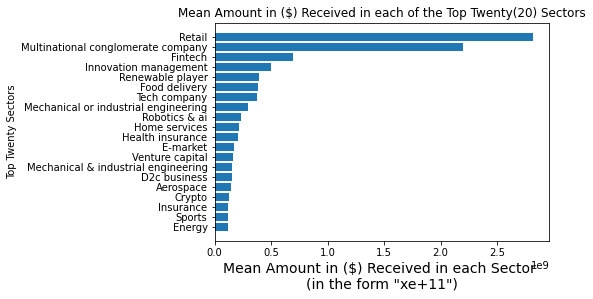

In [47]:
top_20_sectors_average_funding = average_funding_by_sector.sort_values(by = 'Amount($)', ascending = False).head(20).sort_values(by = 'Amount($)')
sector = top_20_sectors_average_funding['Sector']
mean_amount = top_20_sectors_average_funding['Amount($)']

plt.barh(sector, mean_amount)

plt.title('Mean Amount in ($) Received in each of the Top Twenty(20) Sectors')
plt.xlabel('Mean Amount in ($) Received in each Sector \n(in the form "xe+11")', fontsize = 14)
plt.ylabel('Top Twenty Sectors')

plt.show()

### 7. Have the investment trends in the Indian start-up ecosystem shown a preference for fintech companies over other sectors from 2018 to 2021?

In [48]:
def fintech_sector_count(yr):
    year_filt = big_frame['Funding Year'] == yr

    sectors_funded = big_frame.loc[year_filt, ['Sector', 'Amount($)', 'Funding Year']]
    funded_by_sector = sectors_funded.groupby('Sector')['Amount($)'].sum().reset_index()
    filt = (funded_by_sector['Sector'] == 'Fintech')
    df = funded_by_sector.loc[filt]

    sector_list = list(big_frame.loc[year_filt, 'Sector'].dropna(axis = 'index', how = 'all'))
    sector_count = Counter(sector_list)
    sector_count = dict(sorted(sector_count.items(), key=lambda item: item[1], reverse = True))

    df.loc[df.index, 'No. of Companies'] = (sector_count['Fintech'])
    # df['No. of Companies'] = (sector_count['Fintech'])
    
    return df

fintech_sector_count(2018)

C:\Users\Eddison\AppData\Local\Temp\ipykernel_22228\3377637700.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df.index, 'No. of Companies'] = (sector_count['Fintech'])


,Sector,Amount($),No. of Companies
88,Fintech,17600000.0,2.0


In [49]:
fintech_sector_count(2019)

C:\Users\Eddison\AppData\Local\Temp\ipykernel_22228\3377637700.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df.index, 'No. of Companies'] = (sector_count['Fintech'])


,Sector,Amount($),No. of Companies
18,Fintech,30000000.0,5.0


In [50]:
fintech_sector_count(2020)


C:\Users\Eddison\AppData\Local\Temp\ipykernel_22228\3377637700.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df.index, 'No. of Companies'] = (sector_count['Fintech'])


,Sector,Amount($),No. of Companies
118,Fintech,2.123999e+09,131.0


In [51]:
fintech_sector_count(2021)

C:\Users\Eddison\AppData\Local\Temp\ipykernel_22228\3377637700.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df.index, 'No. of Companies'] = (sector_count['Fintech'])


,Sector,Amount($),No. of Companies
101,Fintech,1.526110e+11,121.0


In [52]:
dfs = [fintech_sector_count(2018), fintech_sector_count(2019), fintech_sector_count(2020), fintech_sector_count(2021)]
year = 2018
for i in np.arange(len(dfs)):
    dfs[i]['Funding Year'] = year
    year += 1 
data = pd.concat(dfs, ignore_index = True)
data

C:\Users\Eddison\AppData\Local\Temp\ipykernel_22228\3377637700.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df.index, 'No. of Companies'] = (sector_count['Fintech'])
C:\Users\Eddison\AppData\Local\Temp\ipykernel_22228\3377637700.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df.index, 'No. of Companies'] = (sector_count['Fintech'])
C:\Users\Eddison\AppData\Local\Temp\ipykernel_22228\3377637700.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,Sector,Amount($),No. of Companies,Funding Year
0,Fintech,1.760000e+07,2.0,2018
1,Fintech,3.000000e+07,5.0,2019
2,Fintech,2.123999e+09,131.0,2020
3,Fintech,1.526110e+11,121.0,2021


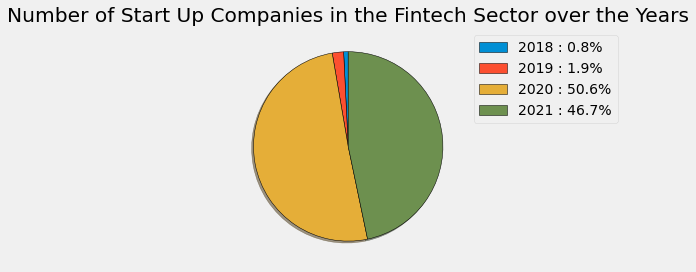

In [53]:
plt.style.use('fivethirtyeight')

slices = data['No. of Companies']
slice_labels = data['Funding Year']
size_pct = [((i/sum(data['No. of Companies']))*100) for i in data['No. of Companies']] # list of the percentage sizes of each slice

legend_labels = [f'{l} : {s:0.1f}%' for l, s in zip(slice_labels, size_pct)]
plt.pie(slices, shadow = True, startangle = 90, wedgeprops = {'edgecolor' : 'black'})

plt.title('Number of Start Up Companies in the Fintech Sector over the Years')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left', labels=legend_labels)
plt.tight_layout()
plt.show()

### Additional Analysis

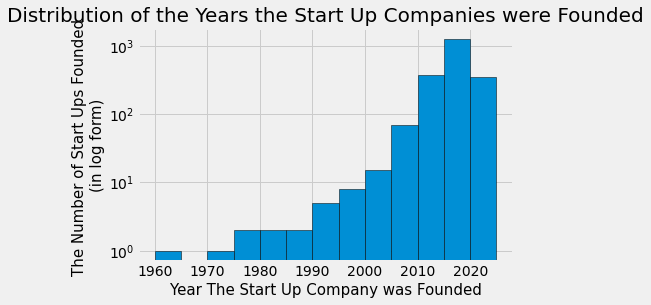

In [54]:
plt.style.use('fivethirtyeight')

year_founded = big_frame['Founded']

start = round(big_frame['Founded'].min(), -1)
stop = big_frame['Founded'].max()
step = 5

bns = np.arange(start, (stop + step), step)

plt.hist(year_founded, bins = bns, edgecolor = 'black', log = True)

plt.title('Distribution of the Years the Start Up Companies were Founded', fontsize = 20)
plt.xlabel('Year The Start Up Company was Founded', fontsize = 15)
plt.ylabel('The Number of Start Ups Founded \n(in log form)', fontsize = 15)

plt.show()

**In conclusion, the null hypothesis that Fintech is the most lucrative sector receiving the most significant funding in the Indian start-up ecosystem has been proven through analysis of funding data and research on the Indian start-up ecosystem datasets.**